<table class="table table-bordered">
    <tr>
        <th style="width:200px;">
            <img src='https://bcgriseacademy.com/hs-fs/hubfs/RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png?width=3522&height=1986&name=RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png' style="background-color:black; width: 100%; height: 100%;">
        </th>
        <th style="text-align:center;">
            <h1>IBF TFIP</h1>
            <h2>Regression with Scikitlearn</h2>
        </th>
    </tr>
</table>

# <a id='toc1_'></a>[Learning Objectives](#toc0_)
#### <a id='toc1_1_1_1_'></a>[After completing this lesson, you should be able to:](#toc0_)
1. LO1: Evaluate a Regression model
2. LO2: Understand Regression coefficients
3. LO3: Validate a model by removing variance and bias
4. LO4: When to use Polynomial Regression over Linear Regression

**Table of contents**<a id='toc0_'></a>      
  - [1 Model Training & Statistics(Part II)](#toc1_2_)    
    - [1.1 Model Evaluation](#toc1_2_1_)    
      - [1.1.1 Unstandardized Regression Coefficients](#toc1_2_1_1_)    
      - [1.1.2 Standardized Regression Coefficients](#toc1_2_1_2_)    
      - [1.1.3 R squared](#toc1_2_1_3_)    
      - [1.1.4 Adj R squared](#toc1_2_1_4_)    
      - [1.1.5 p-values](#toc1_2_1_5_)    
      - [1.1.6 Checking linearity assumptions](#toc1_2_1_6_)    
      - [1.1.7 Regression Evaluation Metrics](#toc1_2_1_7_)    
    - [1.2 Model Validation](#toc1_2_2_)    
      - [1.2.1 Variance vs Bias](#toc1_2_2_1_)    
        - [1.2.1.1 Low Variance - Low Bias](#toc1_2_2_1_1_)    
        - [1.2.1.2 Low Variance - High Bias](#toc1_2_2_1_2_)    
        - [1.2.1.3 High Variance - Low Bias](#toc1_2_2_1_3_)    
        - [1.2.1.4 High Variance - High Bias](#toc1_2_2_1_4_)    
        - [1.2.1.5 Learning Curves](#toc1_2_2_1_5_)    
    - [1.3 Polynomial Regression](#toc1_2_3_)    
      - [1.3.1 Code explanation:](#toc1_2_3_1_)    
    - [1.4 Summary](#toc1_2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


## <a id='toc1_2_'></a>[1. Model Training & Statistics(Part II)](#toc0_)


### <a id='toc1_2_1_'></a>[1.1 Model Evaluation](#toc0_)
    
Simply, building a predictive model is not our motive. But, creating and selecting a model which gives high accuracy on out of sample data. Hence, it is crucial to check accuracy of the model prior to computing predicted values ([Linear Regression Metrics](https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/)). After you are finished building your model, these are some of the important metrics that will help you in [evaluating](https://www.coursera.org/lecture/machine-learning-with-python/model-evaluation-in-regression-models-2WZdq) your model accuracy.  

#### <a id='toc1_2_1_1_'></a>[1.1.1 Unstandardized Regression Coefficients](#toc0_)

One example would be a model of the height of a shrub (Y) based on the amount of bacteria in the soil (X₁) and whether the plant is located in partial or full sun (X₂).

Height is measured in cm, bacteria is measured in thousand per ml of soil, and type of sun = 0 if the plant is in partial sun and type of sun = 1 if the plant is in full sun.

Let’s say it turned out that the regression equation was estimated as follows:


Y = 42 + 2.3*X₁ + 11*X₂

( __Regression Equation : Y = β₁ + β₂X₁ + β₃X₂ +.. + βₚXₚ₋₁ + ϵ__)

* <b>Interpreting Coefficients of Continuous Predictor Variables</b>  
<br>
    Since X1 is a continuous variable, β₂(coefficient of X₁) represents the difference in the predicted value of Y for each one-unit difference in X₁, if X₂ remains constant.This means that if X₁ differed by one unit (and X₂ did not differ) Y will differ by β₂ units, on average.
    
    Taking an example, shrubs with a 5000 bacteria count would, on average, be 2.3 cm taller than those with a 4000/ml bacteria count, which likewise would be about 2.3 cm taller than those with 3000/ml bacteria, as long as they were in the same type of sun.

    *Don’t forget that since the bacteria count was measured in 1000 per ml of soil, 1000 bacteria represent one unit of X₁*.
<br>

* <b>Interpreting Coefficients of Categorical Predictor Variables</b> 
<br>

    <mark>Similarly, β₃ is interpreted as the difference in the predicted value in Y for each one-unit difference in X₂ if X₁ remains constant. However, since X₂ is a categorical variable coded as 0 or 1, a one unit difference represents switching from one category to the other.

    <mark>β3 is then the average difference in Y between the category for which X₂ = 0 (the reference group) and the category for which X₂ = 1 (the comparison group).

    <mark>So compared to shrubs that were in partial sun, we would expect shrubs in full sun to be 11 cm taller, on average, at the same level of soil bacteria.
<br>

* <b>Interpreting Coefficients when Predictor Variables are Correlated</b> 
<br>

    Don’t forget that each coefficient is influenced by the other variables in a regression model. Because predictor variables are nearly always associated, two or more variables may explain some of the same variation in Y.

    Therefore, each coefficient does not measure the total effect on Y of its corresponding variable, as it would if it were the only variable in the model.

    Rather, each coefficient represents the additional effect of adding that variable to the model, if the effects of all other variables in the model are already accounted for. (This is called Type 3 regression coefficients and is the usual way to calculate them. However, not all software uses Type 3 coefficients, so make sure you check your software manual so you know what you’re getting).

#### <a id='toc1_2_1_2_'></a>[1.1.2 Standardized Regression Coefficients](#toc0_)

While building a regression model you may face circumstances where you can find a variable whose unstandardized regression coefficient (aka beta or estimate) is close to zero (.0003) but it is statistically significant (p-value < .05). If a variable is significant, it means its coefficient value is significantly different from zero. The question arises __"Why coefficient value is close to zero if it is a significant variable?__

The answer lies in the __difference between unstandardized coefficient and standardized coefficient__

<mark>If an independent variable is expressed in millions or billions of Rupees (for eg, Rs.656,765), it can have unstandardized estimate close to zero. To make the coefficient value more interpretable, we can rescale the variable by dividing the variable by 1000 or 100,000 (depending on the value). After rescaling the variable, run regression analysis again including the transformed variable. You would find beta coefficient larger than the old coefficient value and significantly larger than 0.  

__Detailed Explanation__

The concept of standardization or standardized coefficients comes into picture when predictors (aka independent variables) are expressed in different units. Suppose you have 3 independent variables - age, height and weight. The variable 'age' is expressed in years, height in cm, weight in kg. If we need to rank these predictors based on the unstandardized coefficient, it would not be a fair comparison as the unit of these variable is not same.

__Real Use of Standardized Coefficients__

They are mainly used to rank predictors (or independent or explanatory variables) as it eliminate the units of measurement of  independent and dependent variables). We can rank independent variables with absolute value of standardized coefficients. The most important variable will have maximum absolute value of standardized coefficient.

__Calculation of Standardized Coefficients__

Standardize both dependent and independent variables and use the standardized variables in the regression model to get standardized estimates. By 'standardize', i mean subtract the mean from each observation and divide that by the standard deviation. It is also called z-score. It would make mean 0 and standard deviation 1.

OR 

You can multiplying the unstandardized coefficient by the ratio of the standard deviations of the independent variable and dependent variable.


#### <a id='toc1_2_1_3_'></a>[1.1.3 R squared](#toc0_)

R squared also known as Coefficient of determination is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

<b>0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.</b>
In general, the higher the R-squared, the better the model fits your data.

<b>Key Limitations of R-squared</b>

1. R-squared cannot determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.  

2. R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data.

<b> Are Low R-squared Values Inherently Bad? </b>

No! There are two major reasons why it can be just fine to have low R-squared values.

In some fields, it is entirely expected that your R-squared values will be low. For example, any field that attempts to predict human behavior, such as psychology, typically has R-squared values lower than 50%. Humans are simply harder to predict than, say, physical processes.

Furthermore, if your R-squared value is low but you have statistically significant predictors, you can still draw important conclusions about how changes in the predictor values are associated with changes in the response value. Regardless of the R-squared, the significant coefficients still represent the mean change in the response for one unit of change in the predictor while holding other predictors in the model constant. Obviously, this type of information can be extremely valuable.

A low R-squared doesn't affect the interpretation of significant variables. A low R-squared is most problematic when you want to produce predictions that are reasonably precise (have a small enough prediction interval). How high should the R-squared be for prediction? Well, that depends on your requirements for the width of a prediction interval and how much variability is present in your data. While a high R-squared is required for precise predictions, it’s not sufficient by itself, as we shall see.
    
\* More reference in the External Link Library

<b> Are High R-squared Values Inherently Good? </b>

No! A high R-squared does not necessarily indicate that the model has a good fit. That might be a surprise, but look at the fitted line plot and residual plot below. The fitted line plot displays the relationship between semiconductor electron mobility and the natural log of the density for real experimental data.

<img src='images/Rsquare1.png' width="500" height="300" align="center"/>

<img src='images/Rsquare2.png' width="530" height="300" align="center"/>

The fitted line plot shows that these data follow a nice tight function and the R-squared is 98.5%, which sounds great. However, look closer to see how the regression line systematically over and under-predicts the data (bias) at different points along the curve. You can also see patterns in the Residuals versus Fits plot, rather than the randomness that you want to see. This indicates a bad fit, and serves as a reminder as to why you should always check the residual plots.

However, similar biases can occur when your linear model is missing important predictors, polynomial terms, and interaction terms. Statisticians call this specification bias, and it is caused by an underspecified model. For this type of bias, you can fix the residuals by adding the proper terms to the model.

\* More reference in the External Link Library


#### <a id='toc1_2_1_4_'></a>[1.1.4 Adj R squared](#toc0_)

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance.
    
\* More reference in the External Link Library

<b>Some Problems with R-squared</b>

R-squared cannot determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots. However, R-squared has additional problems that the adjusted R-squared and predicted R-squared are designed to address.

* <b>Problem 1:</b> Every time you add a predictor to a model, the R-squared increases, even if due to chance alone. It never decreases. Consequently, a model with more terms may appear to have a better fit simply because it has more terms.

* <b>Problem 2:</b> If a model has too many predictors and higher order polynomials, it begins to model the random noise in the data. This condition is known as overfitting the model and it produces misleadingly high R-squared values and a lessened ability to make predictions.

<b> What is the adjusted R-squared</b>

The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

Suppose you compare a five-predictor model with a higher R-squared to a one-predictor model. Does the five predictor model have a higher R-squared because it’s better? Or is the R-squared higher because it has more predictors? Simply compare the adjusted R-squared values to find out!

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not.  It is always lower than the R-squared.

<b> Difference between R-squared and adjusted R-squared</b>

* One <b>major difference</b> between R-squared and the adjusted R-squared is that R-squared supposes that every independent variable in the model explains the variation in the dependent variable. It gives the percentage of explained variation as if all independent variables in the model affect the dependent variable. Adjusted R-squared, on the other hand, gives the percentage of variation explained by only those independent variables that in reality affect the dependent variable.
<br>

* R-squared cannot verify whether the coefficient ballpark figure and its predictions are prejudiced. The adjusted R-squared compares the descriptive power of regression models that include diverse numbers of predictors. The adjusted R-squared compensates for the addition of variables and only increases if the new term enhances the model above what would be obtained by probability and decreases when a predictor enhances the model less than what is predicted by chance.
<br>

* R-squared also does not show if a regression model is satisfactory; it can show an R-squared figure for a good model, or a high R-squared figure for a model that doesn’t fit.

#### <a id='toc1_2_1_5_'></a>[1.1.5 p-values](#toc0_)

The p-value is the level of marginal significance within a statistical hypothesis test representing the probability of the occurrence of a given event. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the [null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) would be rejected. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis. 

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

    
You can also develop your linear regression model using Statsmodels package. The benefit of using Statsmodels package is that it provides an extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics that are available for different types of data and each estimator. Statsmodels is built on top of the numerical libraries NumPy and SciPy, integrates with Pandas for data handling and uses Patsy for an R-like formula interface. Statsmodels provides the statistical backend for other Python libraries. Statmodels is free software released under the Modified BSD (3-clause) license.


<b>Note that Statsmodels does not add a constant term (recall the factor β1) by default</b>  
A constant term can easily be added to the linear regression model. You can do it by X = sm.add_constant(X) (X is the name of the dataframe containing the input (independent variables).

In [26]:
# Importing train_df1 generated from part 1 module
import pandas as pd
train_df1= pd.read_csv(r'Input/train_df1.csv')
# Importing y_df1 generated from part 1 module
y_df1=pd.read_csv(r'Input/y_df1.csv')

In [27]:
# Importing linear model function from sklearn

from sklearn import linear_model

X = train_df1
y = y_df1['Score']
lm = linear_model.LinearRegression()

# Fitting the linear regression model
model = lm.fit(X,y)

In [28]:
import statsmodels.api as sm
from scipy.stats.mstats import zscore

# Fit and make the predictions by the model
X = sm.add_constant(X)
model = sm.OLS(list(y), X).fit()
predictions = model.predict(X)


In [29]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     400.1
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:02:54   Log-Likelihood:                -27319.
No. Observations:                6285   AIC:                         5.469e+04
Df Residuals:                    6261   BIC:                         5.485e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                      -2965.0784   1145.113     -2.589      0.010   -5209.892    -720.265
index                                                         -0.0020      0.001     -1.961      0.050      -0.004   -7.52e-07
Order                                                          0.0014      0.001      1.641      0.101      -0.000       0.003
Property Id                                                -1.725e-06   2.33e-07     -7.413      0.000   -2.18e-06   -1.27e-06
DOF Gross Floor Area                                       -1.371e-07   1.18e-06     -0.116      0.907   -2.45e-06    2.17e-06
Year Built                                                    -0.1244      0.009    -14.626      0.000      -0.141      -0.108
Number of Buildings - Self-reported                           -0.1019      0.063     -1.613      0.107      -0.226       0.022
Occupancy                                                     -0.0314      0.040     -0.787      0.431      -0.110       0.047
Site EUI (kBtu/ft²)                                           -0.6776      0.011    -60.166      0.000      -0.700      -0.655
Weather Normalized Site Electricity Intensity (kWh/ft²)       -1.0117      0.071    -14.255      0.000      -1.151      -0.873
Weather Normalized Site Natural Gas Intensity (therms/ft²)    -3.7141      0.969     -3.833      0.000      -5.614      -1.815
Weather Normalized Site Natural Gas Use (therms)           -4.214e-07   1.57e-06     -0.269      0.788    -3.5e-06    2.66e-06
Weather Normalized Site Electricity (kWh)                   1.239e-06   1.01e-07     12.235      0.000    1.04e-06    1.44e-06
Water Intensity (All Water Sources) (gal/ft²)               7.313e-05      0.000      0.167      0.868      -0.001       0.001
Latitude                                                      13.6203      8.478      1.607      0.108      -2.999      30.240
Longitude                                                    -37.6823     11.794     -3.195      0.001     -60.802     -14.563
Community Board                                                0.2920      0.085      3.421      0.001       0.125       0.459
Council District                                               0.1082      0.053      2.027      0.043       0.004       0.213
Census Tract                                               -7.261e-06   2.05e-05     -0.355      0.723   -4.74e-05    3.28e-05
log_Largest Property Use Type - Gross Floor Area (ft²)        -1.3243      0.559     -2.368      0.018      -2.421      -0.228
log_Direct GHG Emissions (Metric Tons CO2e)                    1.6924      0.302      5.607      0.000       1.101       2.284
log_Water Intensity (All Water Sour

In [30]:
# Removing variables with high p value & with no or little business sense

columns = ['Latitude','Longitude','Water Intensity (All Water Sources) (gal/ft²)', 'Number of Buildings - Self-reported','Weather Normalized Site Natural Gas Use (therms)',
          'Occupancy','DOF Gross Floor Area','Census Tract', 'Property Id', 'log_Water Intensity (All Water Sources) (gal/ft²)']

train_df2 = train_df1.drop(columns, axis = 1)

In [31]:
import statsmodels.api as sm

# Fit and make the predictions by the model
train_df2 = sm.add_constant(train_df2)
model_new = sm.OLS(list(y), train_df2).fit()
predictions = model_new.predict(train_df2)

In [32]:
# Printing out model summary

model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     694.9
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:02:54   Log-Likelihood:                -27357.
No. Observations:                6285   AIC:                         5.474e+04
Df Residuals:                    6271   BIC:                         5.484e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        383.0406     16.251     23.570      0.000     351.183     414.898
index                                                         -0.0023      0.001     -2.280      0.023      -0.004      -0.000
Order                                                          0.0015      0.001      1.808      0.071      -0.000       0.003
Year Built                                                    -0.1326      0.008    -15.685      0.000      -0.149      -0.116
Site EUI (kBtu/ft²)                                           -0.6770      0.011    -60.749      0.000      -0.699      -0.655
Weather Normalized Site Electricity Intensity (kWh/ft²)       -1.0028      0.069    -14.609      0.000      -1.137      -0.868
Weather Normalized Site Natural Gas Intensity (therms/ft²)    -3.8774      0.944     -4.108      0.000      -5.728      -2.027
Weather Normalized Site Electricity (kWh)                   1.301e-06   9.24e-08     14.086      0.000    1.12e-06    1.48e-06
Community Board                                                0.2554      0.084      3.040      0.002       0.091       0.420
Council District                                               0.0728      0.032      2.255      0.024       0.010       0.136
log_Largest Property Use Type - Gross Floor Area (ft²)        -1.2103      0.504     -2.400      0.016      -2.199      -0.222
log_Direct GHG Emissions (Metric Tons CO2e)                    1.6827      0.301      5.587      0.000       1.092       2.273
Borough_Queens                                                 4.6718      1.140      4.098      0.000       2.437       6.907
Borough_Staten Island                                          6.6911      2.595      2.579      0.010       1.604      11.778
==============================================================================
Omnibus:                      336.953   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.833
Skew:                          -0.402   Prob(JB):                    1.71e-137
Kurtosis:                       4.326   Cond. No.                     2.66e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <a id='toc1_2_1_6_'></a>[1.1.6 Checking linearity assumptions](#toc0_)

In [33]:
# Check for heteroscedasticity 

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Lagrange','p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model_new.resid, model_new.model.exog)
lzip(name, test)

[('Lagrange', 683.4570434104302),
 ('p-value', 1.1809776712622922e-137),
 ('f-value', 58.85684811710771),
 ('f p-value', 5.151516808628059e-146)]

__As you can see here that the p-value of this test is < 0.05, therefore we can reject the null hypothesis that the variance of the residuals is constant and infer that heteroscedasticity is indeed present, hence we need to perform further iterations to remove it.__

In [34]:
# Check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=2.0):
    variables = list(range(X.shape[1]))
    drop_cols = list()
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            drop_cols.append(X.iloc[:, variables].columns[maxloc])
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables], drop_cols

X_train, drop_cols = calculate_vif_(train_df2)

dropping 'const' at index: 0
dropping 'Order' at index: 1
dropping 'log_Largest Property Use Type - Gross Floor Area (ft²)' at index: 8
dropping 'Year Built' at index: 1
dropping 'index' at index: 0
dropping 'log_Direct GHG Emissions (Metric Tons CO2e)' at index: 6
dropping 'Site EUI (kBtu/ft²)' at index: 0
dropping 'Community Board' at index: 3
dropping 'Weather Normalized Site Natural Gas Intensity (therms/ft²)' at index: 1
Remaining variables:
Index(['Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Electricity (kWh)', 'Council District',
       'Borough_Queens', 'Borough_Staten Island'],
      dtype='object')


In [35]:
# Removing variables with multicollinearity

columns = ['const','log_Largest Property Use Type - Gross Floor Area (ft²)','Year Built', 'Order', 'Community Board']

train_df3 = train_df2.drop(columns, axis = 1)

In [36]:
import statsmodels.api as sm

# Fit and make the predictions by the model
model_new1 = sm.OLS(list(y), train_df3).fit()

# Once you fit the model using .fit() function, you can predict the values using .predict().
# In reality once the model has been fit, the scoring(prediction can be performed on new data). Currently we are trying to predict the same dataset
predictions = model_new1.predict(train_df3)

In [37]:
model_new1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              3809.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:02:55   Log-Likelihood:                         -29525.
No. Observations:                6285   AIC:                                  5.907e+04
Df Residuals:                    6276   BIC:                                  5.913e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
index                                                          0.0037      0.000     17.958      0.000       0.003       0.004
Site EUI (kBtu/ft²)                                           -0.7525      0.015    -50.818      0.000      -0.782      -0.723
Weather Normalized Site Electricity Intensity (kWh/ft²)        1.1207      0.085     13.157      0.000       0.954       1.288
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -12.1225      1.319     -9.189      0.000     -14.709      -9.536
Weather Normalized Site Electricity (kWh)                   3.912e-07   1.06e-07      3.689      0.000    1.83e-07    5.99e-07
Council District                                              -0.0448      0.040     -1.110      0.267      -0.124       0.034
log_Direct GHG Emissions (Metric Tons CO2e)                   17.2557      0.227     75.933      0.000      16.810      17.701
Borough_Queens                                               -12.1578      1.369     -8.882      0.000     -14.841      -9.475
Borough_Staten Island                                        -17.8602      3.400     -5.253      0.000     -24.526     -11.195
==============================================================================
Omnibus:                      119.155   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.006
Skew:                           0.004   Prob(JB):                     5.15e-55
Kurtosis:                       3.977   Cond. No.                     3.95e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Dropping Weather Normalized Site Electricity (kWh) due to high p value

train_df4 = train_df3.drop('Weather Normalized Site Electricity (kWh)', axis = 1)


In [39]:
# Fit and make the predictions by the model
model_new2 = sm.OLS(list(y), train_df4).fit()
model_new2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              4275.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:02:55   Log-Likelihood:                         -29532.
No. Observations:                6285   AIC:                                  5.908e+04
Df Residuals:                    6277   BIC:                                  5.913e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
index                                                          0.0036      0.000     17.676      0.000       0.003       0.004
Site EUI (kBtu/ft²)                                           -0.7552      0.015    -51.008      0.000      -0.784      -0.726
Weather Normalized Site Electricity Intensity (kWh/ft²)        1.2500      0.078     16.088      0.000       1.098       1.402
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -12.2602      1.320     -9.288      0.000     -14.848      -9.673
Council District                                              -0.0401      0.040     -0.991      0.322      -0.119       0.039
log_Direct GHG Emissions (Metric Tons CO2e)                   17.3042      0.227     76.197      0.000      16.859      17.749
Borough_Queens                                               -11.8745      1.368     -8.681      0.000     -14.556      -9.193
Borough_Staten Island                                        -17.9234      3.403     -5.266      0.000     -24.595     -11.251
==============================================================================
Omnibus:                      123.809   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.417
Skew:                           0.019   Prob(JB):                     6.30e-58
Kurtosis:                       4.002   Cond. No.                     6.98e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

------------------------------------------------------------------------------------------------------------------------------

__Observations__

* All variables except Weather Normalized Site Electricity (kWh) have p-value < 0.05
<br>

* R squared value > 0.6
<br>

* Adj R squared close to R square
<br>

* Except Borough_Staten Island, all the other variables have +ve coefficient i.e. they have +ve relation with the dependent variable while Borough_Staten_Island have -ve relation which means increase in Borough_Staten_Island leads to low Scores and vice-versa
<br>
------------------------------------------------------------------------------------------------------------------------------


#### <a id='toc1_2_1_7_'></a>[1.1.7 Regression Evaluation Metrics](#toc0_)

Here are three common evaluation metrics for regression problems:

* **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:  It is a measure of difference between two continuous variables. It is the simplest measure of forecast accuracy. MAE is simply, as the name suggests, is the mean of the absolute errors. The absolute error is the absolute value of the difference between the forecasted value and the actual value. MAE tells us how big of an error we can expect from the forecast on average.One problem with the MAE is that the relative size of the error is not always obvious. Sometimes it is hard to tell a big error from a small error. To deal with this problem, we can find the mean absolute error in percentage terms. Mean Absolute Percentage Error (MAPE) allows us to compare forecasts of different series in different scales. 

<br>

* **Mean Squared Error (MSE)** is the mean of the squared errors: It measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated. MSE) is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.
    The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.
    
<br>

* **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors: The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. 

   <b> Quick Summary</b>
    
* MAE is the easiest to understand, because it's the average error.
* MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
* RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.

    
\* More reference in the External Link Library


In [40]:
# Calculating Regression Evaulation metrics
import numpy as np
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

MAE: 20.96115813035346
MSE: 704.598947154503
RMSE: 26.544282758336173


Currently the model has high MAE & RMSE, and hence you can refine the model further by performing more iterations - i.e. including other variables and re-iterating the model

In [41]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

### <a id='toc1_2_2_'></a>[1.2 Model Validation](#toc0_)


#### <a id='toc1_2_2_1_'></a>[1.2.1 Variance vs Bias](#toc0_)

The prediction error for any machine learning algorithm can be broken down into three parts:

* __Bias Error:__ Bias are the simplifying assumptions made by a model to make the target function easier to learn.
* __Variance Error:__ Variance is the amount that the estimate of the target function will change if different training data was used.
* Irreducible Error

The irreducible error cannot be reduced regardless of what algorithm is used. It is the error introduced from the chosen framing of the problem and may be caused by factors like unknown variables that influence the mapping of the input variables to the output variable.

<img src='images/Variance_vs_bias.png' width="400" height="200" align="center"/>


<br>

__In the above diagram, center of the target is a model that perfectly predicts correct values. As we move away from the bulls-eye our predictions become get worse and worse.__

##### <a id='toc1_2_2_1_1_'></a>[1.2.1.1 Low Variance - Low Bias](#toc0_)

<br> 

<img src='images/Desired.png' width="200" height="200" align="center"/>

The model perfectly predicts correct values i.e. (y - predicted) has very low error.
<br>

##### <a id='toc1_2_2_1_2_'></a>[1.2.1.2 Low Variance - High Bias](#toc0_)

<br>

<img src='images/Underfitting.png' width="200" height="200" align="center"/>

Underfitting happens when a model unable to capture the underlying pattern of the data. It happens when we have very little amount of data to build an accurate model or when we try to build a linear model with a nonlinear data. __If our model is too simple and has very few parameters then it may have high bias and low variance__. It is usually the case in Linear Regression, Linear Discriminant Analysis, Logistic Regression etc
<br>

##### <a id='toc1_2_2_1_3_'></a>[1.2.1.3 High Variance - Low Bias](#toc0_)

<br>

<img src='images/Overfitting.png' width="200" height="200" align="center"/>

Overfitting happens when our model captures the noise along with the underlying pattern in data. It happens when we train our model a lot over noisy dataset. __If our model has large number of parameters then it’s going to have high variance and low bias__. It is usually the case in Decision Trees, k-Nearest Neighbors, Support Vector Machines etc
<br>

##### <a id='toc1_2_2_1_4_'></a>[1.2.1.4 High Variance - High Bias](#toc0_)
The model has not been able to learn anything from the data and hence throw random predicted values
<br>

\* More reference in the External Link Library

In reality since we can't have both low bias and low variance, so we want to aim for something in the middle

<img src='images/biasvariance.png' width="500" height="300" align="center"/>

##### <a id='toc1_2_2_1_5_'></a>[1.2.1.5 Learning Curves](#toc0_)

Let's say we have some data and split it into a training set and test set. We take one single instance (yes you read it correctly just 1 observation) from the training set and use it to estimate a model. Then we measure the model's error on the test set and on that single training instance. The error on the training instance will be 0, since it's quite easy to perfectly fit a single data point. The error on the test set, however, will be very large. That's because the model is built around a single instance, and it almost certainly won't be able to generalize accurately on data that hasn't seen before.

Now let's say that instead of one training instance, we take ten and repeat the error measurements. Then we take fifty, one hundred, five hundred, until we use our entire training set. The error scores will vary more or less as we change the training set

We thus have two error scores to monitor: one for the validation set, and one for the training sets. If we plot the evolution of the two error scores as training sets change, we end up with two curves. These are called _learning curves_. __In a nutshell, a learning curve shows how error changes as the training set size increases__


### <a id='toc1_2_3_'></a>[1.3 Polynomial Regression](#toc0_)

Linearity is mathematically the nicest case that you can have. However, sometimes you may want to use higher order terms to see whether incorporating them might give you a better model for your phenomenon.

In this lesson, we’ll take a look at polynomial regression.

In polynomial regression with only one independent variable,we seek a regression model of the form
f (x) = bₒ+ b₁x +b₂x²+ ⋯ + bₖxᵏ

With multiple variables, for example,x(x₁,x₂) a quadratic model would take the form
f (x₁,x₂) = bₒ + b₁x₁+ b₂x₂ + b₃x₁x₂ +b₄x₁x₂+b₅x₂²

The term x₁,x₂ is called **a mixed term**

Higher-order regression models with many variables can be written down similarly using multi-variate notation.

In polynomial regression with only one independent variable, what we’re seeking is a regression model that contains not only the linear term, but also possibly a quadratic term, a cubic term, and then a term up to some higher order, say x to the power of k.

One of the reasons why you may want to use a polynomial regression model is to take into account the fact that your data may not be linear. It may not be modeled well using a linear model, and so you want to take into account some possible non-linear effects using a polynomial regression model. Now, when you have multiple variables—for example, say that you have an input where you’ve got two components for the input—then a quadratic model would take this form.

In the next section why it would be wise to use Polynomial Regression over Linear Regression in some cases

Linear Regression is applied for a data set when the values are linear. For example:

<br>
<img src='images/LR1.jpg' width="600" height="400" align="center"/>
<br>

And real life is not that simple, especially when you observe from many different companies in different industries. Salary of 1 YE business analyst is different from 1 YE engineer; even 1 YE civil engineer is different from computer engineer; and if you compare 2 civil engineers from 2 different companies, their salary mostly different as well. So how can we predict the salary of a candidate?

We are going to use the below dataset to represent a polynomial shape

<br>
<img src='images/Salary.jpg' width="500" height="400" align="center"/>
<br>


To get an overview of the increment of salary, let’s visualize the data set into a chart:

<br>
<img src='images/salary_YE.png' width="600" height="400" align="center"/>
<br>

According to the picture above, the salary range of a candidate with 5.5. YE could be approximately from 0 to $200,000. Why? Look, the salary observations in this scenarios are not linear. They are in a curved shape! That’s why applying Linear Regression in this scenario is not giving you the right value. It’s time for Polynomial Regression.


We will now apply Polynomial Regression on the avove set to see how the result differs from Linear Regression

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv(r'Data/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [43]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### <a id='toc1_2_3_1_'></a>[1.3.1 Code explanation:](#toc0_)

**Dataset**: the table contains all values in our csv file
X: the 2nd column which contains Years Experience array
y: the last column which contains Salary array
Let’s split our dataset to get training set and testing set (both X and y values per each set)


**test_size=0.2**: we will split our dataset (10 observations) into 2 parts (training set, test set) and the ratio of test set compare to dataset is 0.2 (2 observations will be put into the test set. You can put it 1/5 to get 20% or 0.2, they are the same. We should not let the test set too big; if it’s too big, we will lack of data to train. Normally, we should pick around 5% to 30%.

**train_size**: if we use the test_size already, the rest of data will automatically be assigned to train_size.
random_state: this is the seed for the random number generator. We can put an instance of the RandomState class as well. If we leave it blank or 0, the RandomState instance used by np.random will be used instead.

We already have the train set and test set, now we have to build the Regression Model. Firstly, we will build a Linear Regression model and visualize it (it’s no need to include this step in your practice, we just do this for comparison between Linear and Polynomial only):

In [44]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [45]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

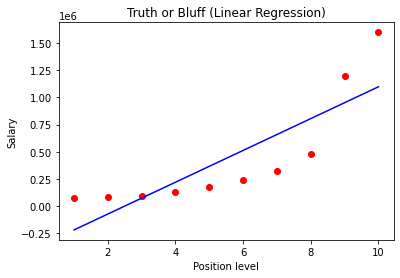

In [46]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In another hand, we will build the Polynomial Regression model and visualize it to see the differences:

In [47]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

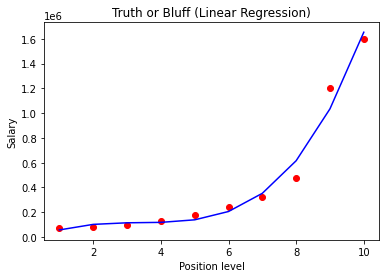

In [48]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [49]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 439200

array([439200.])

In [50]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 164562.49999

array([164562.49999996])

You can see, the predicted values using Linear Regression model and Polynomial Regression model are totally different!

According to the  data set, the salary of the candidate should be:

$0 < salary < $250,000

But the predicted salary using Linear Regression lin_reg is `$439,200`.
It is unacceptable!
What is about using Polynomial Regression? Our pol_reg value is `$164,562.99` which is very close to our Mean value of the dataset.


### <a id='toc1_2_4_'></a>[1.4 Summary](#toc0_)

<br>

<font size = 3>
    
__What we have learned today__

* If your value of R-squared  is large, you have a better chance of your regression model fitting the observations. 

* A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. 

* There should be no multicollinearity or heteroscedasticity 

* Bias and Variance is always a balance i.e., higher bias leads to lower variance. The goal is to have low for both, but in real world, it is a balance
  
* There could be situations when Polynomial Regression would be a better choice over Linear Regression based on the dataset

Finally, remember to K.I.S.S. (keep it simple...) If two models are generally similar in terms of their error statistics and other diagnostics, you should prefer the one that is simpler and/or easier to understand. The simpler model is likely to be closer to the truth, and it will usually be more easily accepted by others.

</font>

                **************************> This is the end of our session ******************************

Copyright © 2023 by Boston Consulting Group. All rights reserved.